In [ ]:
# song_name: Это числовое представление имени песни. Каждому уникальному имени песни присваивается уникальное число.
# song_popularity: Это показатель популярности песни.
# song_duration_ms: Длительность песни в миллисекундах.
# acousticness: Мера акустичности песни.
# danceability: Мера танцевальности песни.
# energy: Мера энергичности песни.
# instrumentalness: Мера инструментальности песни.
# key: Музыкальный ключ песни.
# liveness: Мера “живости” песни.
# loudness: Громкость песни.
# audio_mode: Музыкальный режим песни.
# speechiness: Мера “речевого” содержания в песне.
# tempo: Темп песни.
# time_signature: Музыкальный размер песни.
# audio_valence: Мера “положительности” или “счастливости” песни.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


In [5]:
data = pd.read_csv("song_data.csv")


# Создаем экземпляр LabelEncoder
le = LabelEncoder()

# Преобразуем столбец song_name
data = data.drop('song_name', axis=1).drop('key', axis=1).drop('time_signature', axis=1)

# Показываем первые 5 строк обновленного DataFrame
data.head()


song_popularity  song_duration_ms  acousticness  danceability  energy  \
0               73            262333      0.005520         0.496   0.682   
1               66            216933      0.010300         0.542   0.853   
2               76            231733      0.008170         0.737   0.463   
3               74            216933      0.026400         0.451   0.970   
4               56            223826      0.000954         0.447   0.766   

   instrumentalness  liveness  loudness  audio_mode  speechiness    tempo  \
0          0.000029    0.0589    -4.095           1       0.0294  167.060   
1          0.000000    0.1080    -6.407           0       0.0498  105.256   
2          0.447000    0.2550    -7.828           1       0.0792  123.881   
3          0.003550    0.1020    -4.938           1       0.1070  122.444   
4          0.000000    0.1130    -5.065           1       0.0313  172.011   

   audio_valence  
0          0.474  
1          0.370  
2          0.324  
3          0.198  
4          0.574

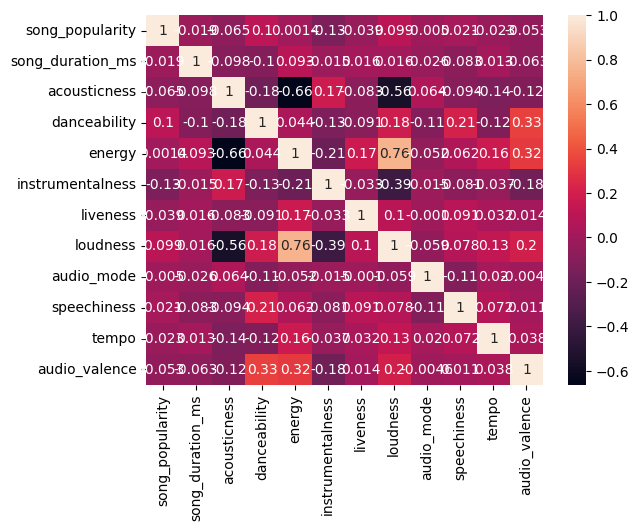

In [6]:
hm = sns.heatmap(data.corr(),
                 cbar=True,
                 annot=True)

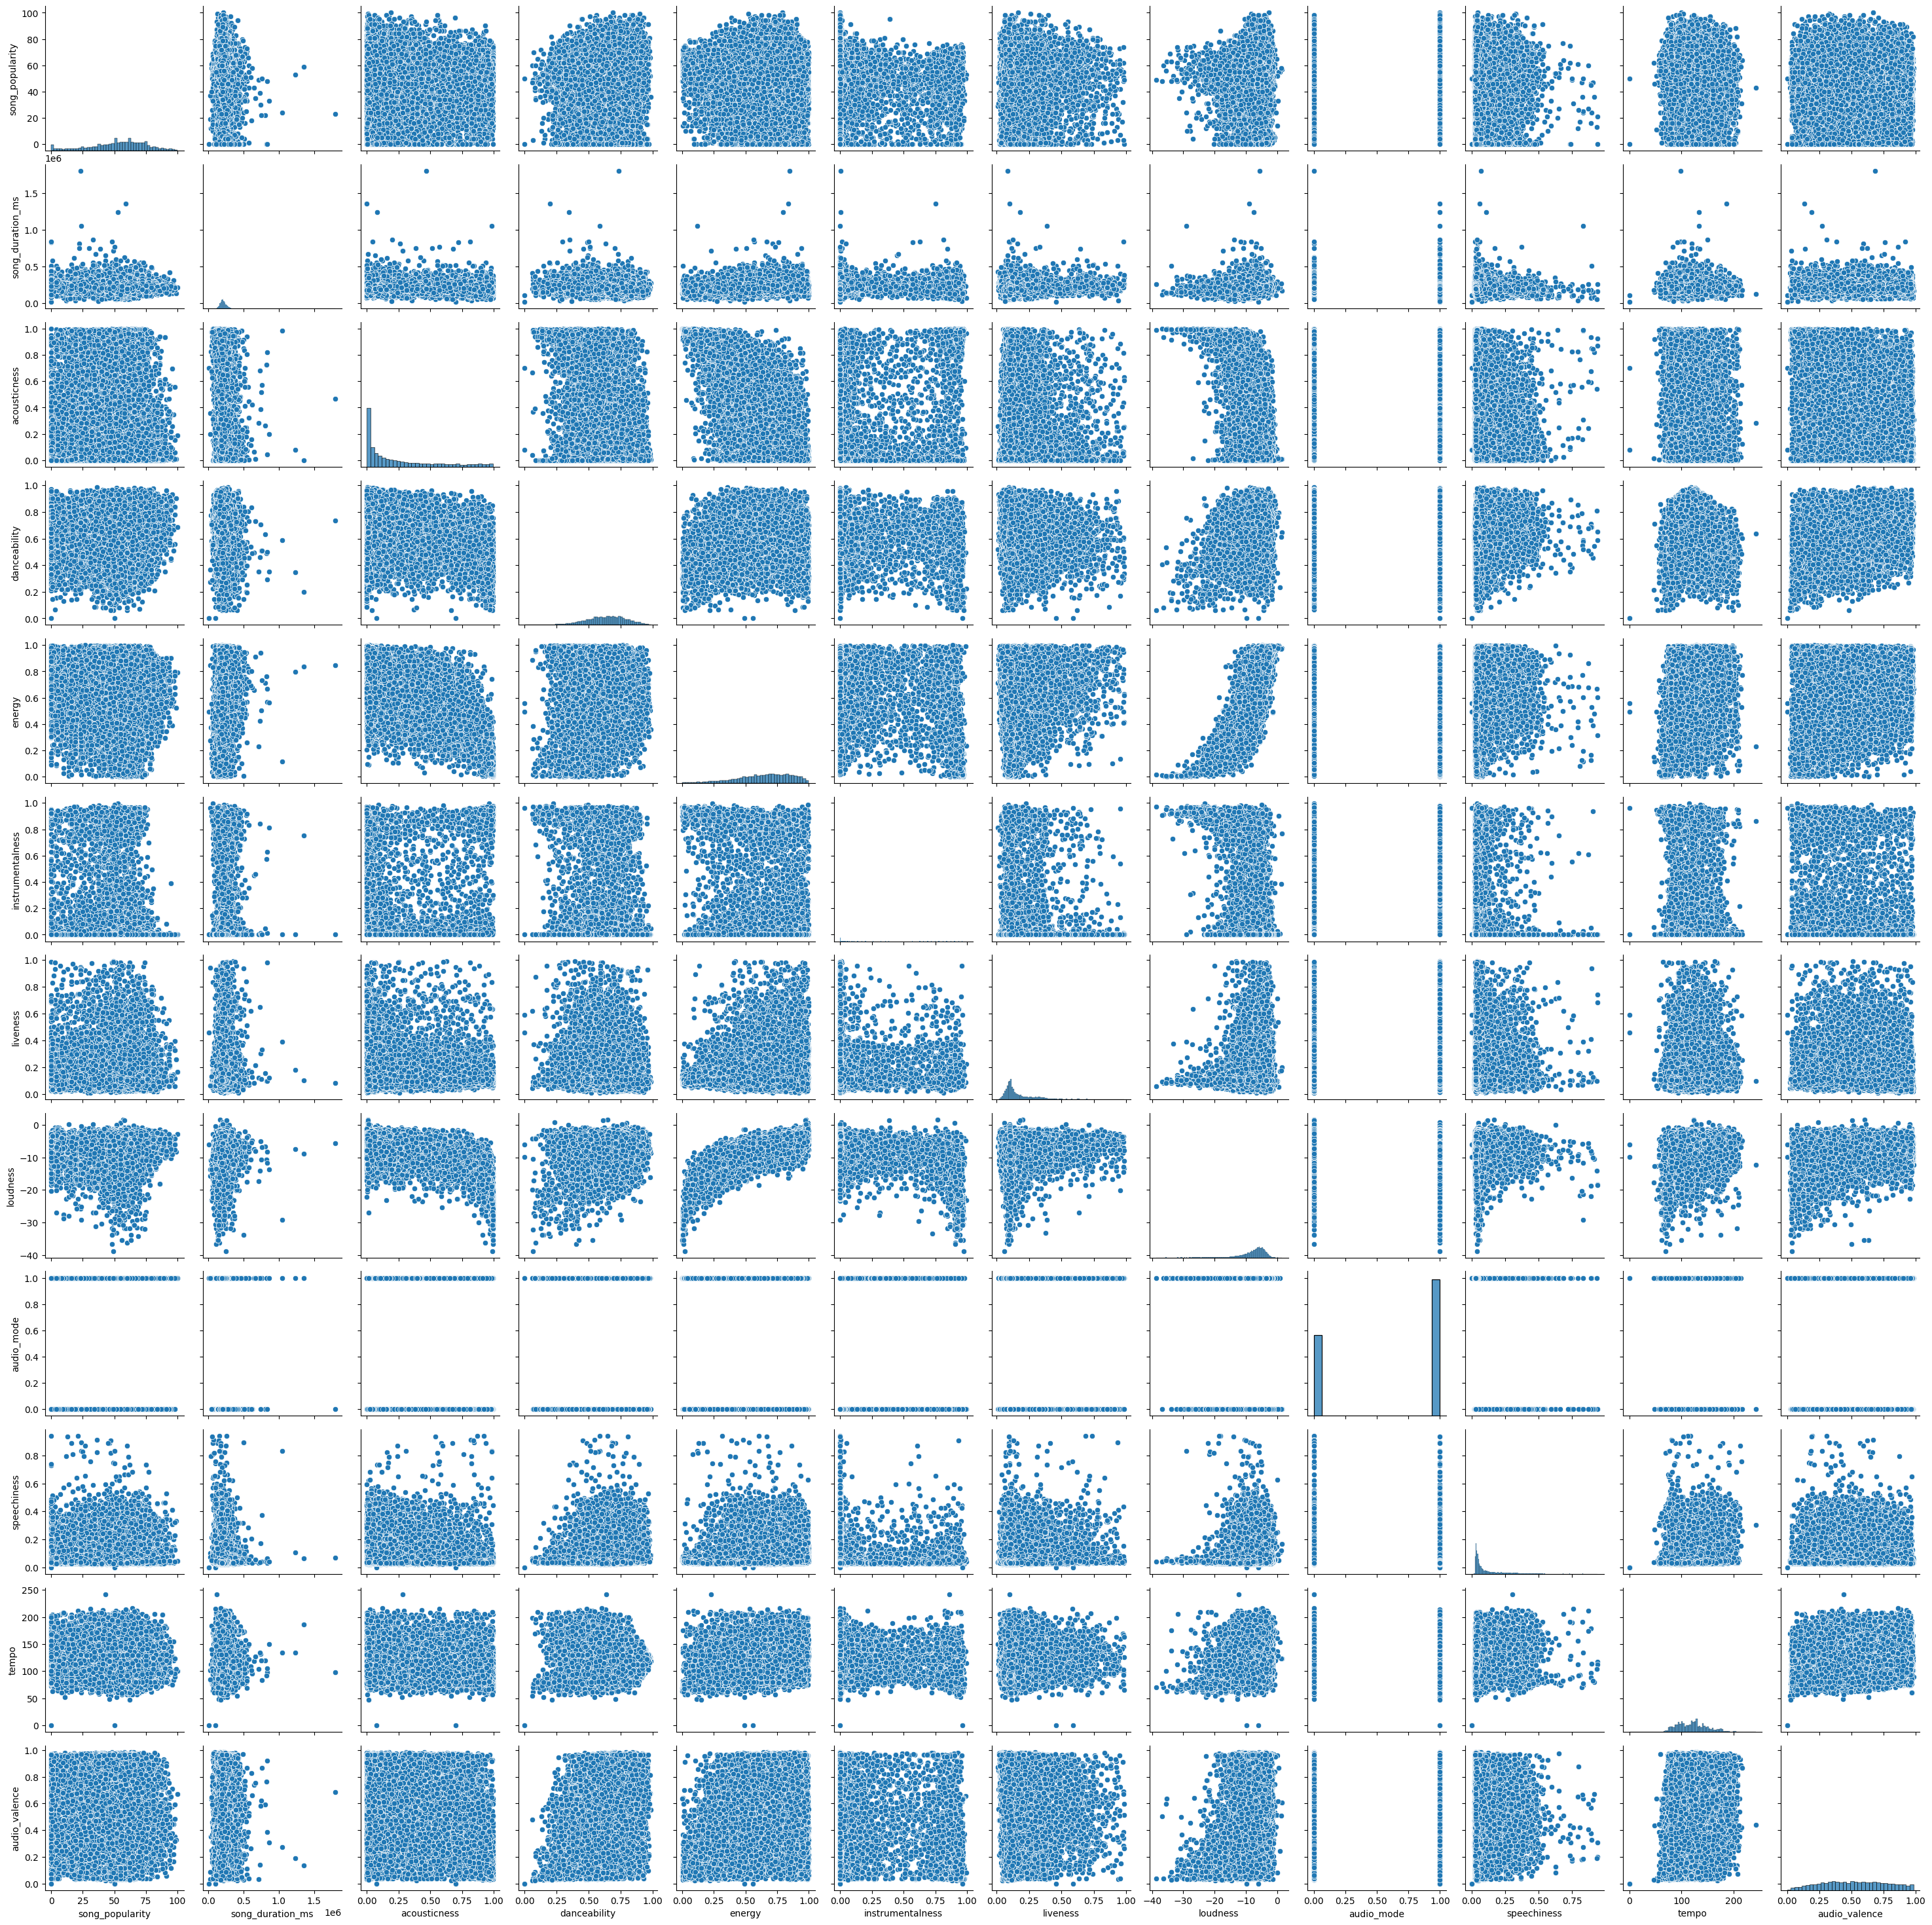

In [7]:
g = sns.PairGrid(data)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

<Axes: xlabel='loudness', ylabel='energy'>

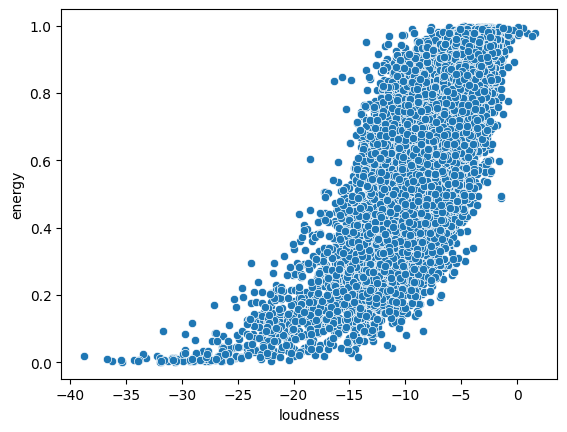

In [8]:
sns.scatterplot(data=data, x="loudness", y="energy")


In [9]:
X = data['loudness'].values.reshape(-1,1)
y = data['energy'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

In [10]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))

0.042257987219022915
0.9597083556483812
The linear model is: Y = 0.95971 + 0.042258X


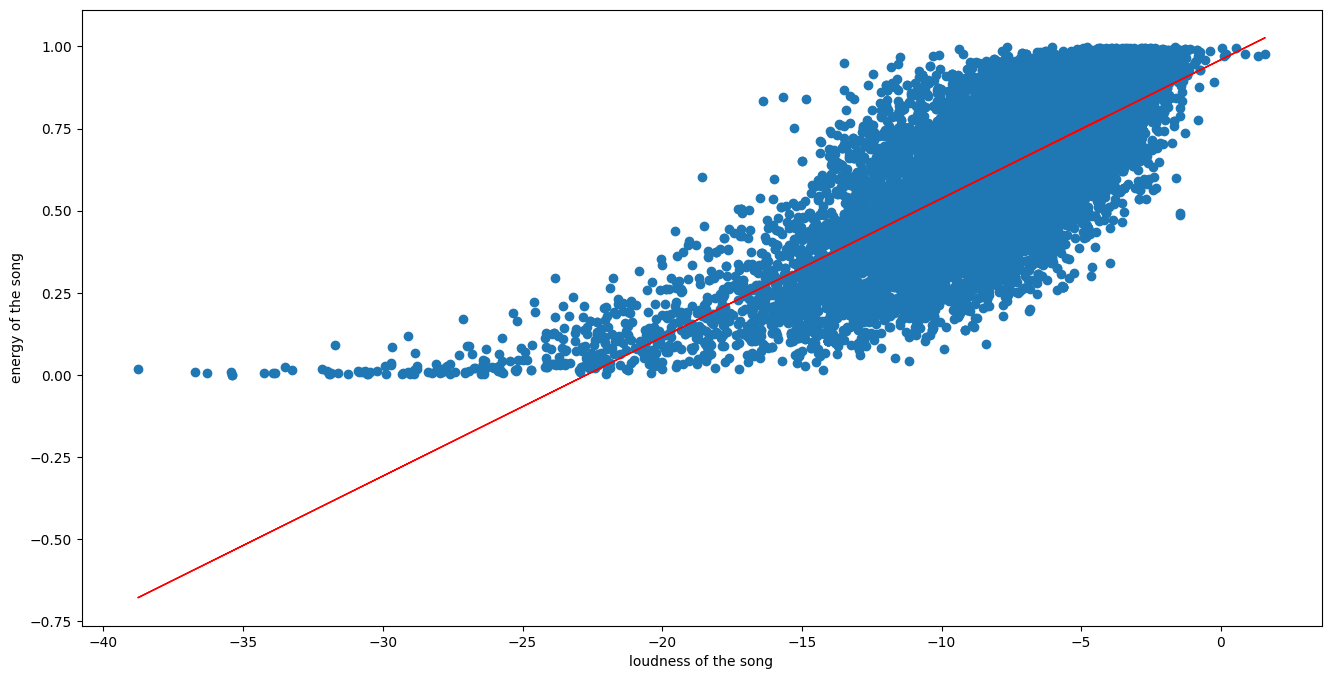

In [14]:
predictions = reg.predict(X)

plt.figure(figsize=(16, 8))
plt.scatter(
    data['loudness'],
    data['energy'],
    )
plt.plot(
    data['loudness'],
    predictions,
    c='red',
    linewidth=1
)
plt.xlabel("loudness of the song")
plt.ylabel("energy of the song")
plt.show()

In [45]:
reg.score(X, y, sample_weight=None) #коэффициент детерминации 

0.5708036795180886

In [47]:
Xs = data.drop(['energy'], axis=1)
y = data['energy'].values.reshape(-1,1)

reg = LinearRegression()
reg.fit(Xs, y)

LinearRegression()

In [50]:
print(reg.coef_)
print(reg.intercept_) 
# тут получили вклад других параметров на энергичность песни, хотя будто кроме громкости ничего и не влияет xddddd

[[-3.11704014e-04  1.67168915e-07 -2.60502461e-01 -2.45078739e-01
   9.57531733e-02  8.66711917e-02  3.22115816e-02 -3.58632787e-03
   5.28554165e-02  5.84638779e-05  2.06645147e-01]]
[0.94513419]


In [51]:
reg.score(Xs, y) #коэффициент детерминации 

0.7316239539388968


<!-- 1. Что такое корреляция? -->
    Корреляция — это статистическая мера, которая показывает степень и направление взаимосвязи между двумя переменными. Если изменение одной переменной связано с изменением другой, то говорят, что между этими переменными существует корреляция.
<!-- 2. Что показывает коэффициент корреляции? Каким он может быть? -->
    Коэффициент корреляции (обычно обозначаемый как r) количественно измеряет силу и направление линейной взаимосвязи между двумя переменными. 
    Значения коэффициента корреляции могут варьироваться от -1 до 1:
    r=1: Идеальная положительная линейная корреляция, т.е. если одна переменная увеличивается, другая также увеличивается пропорционально.
    r=−1: Идеальная отрицательная линейная корреляция, т.е. если одна переменная увеличивается, другая уменьшается пропорционально.
    r=0: Отсутствие линейной корреляции, т.е. изменение одной переменной не связано с изменением другой.
<!-- 3. Что представляет из себя модель простой линейной регрессии? -->
    Модель простой линейной регрессии описывает линейную зависимость между двумя переменными: зависимой (целевая переменная) и одной независимой (предиктор). Формула простой линейной регрессии: y = Bo + B1x,
    y — зависимая переменная, x — независимая переменная, Bo = свободный член, B1 - коэф регрессии, наклон
<!-- 4. Чем множественная линейная регрессия отличается от простой линейной регрессии? -->
    Множественная линейная регрессия расширяет модель простой линейной регрессии, чтобы учитывать более одной независимой переменной. 
    Формула множественной линейной регрессии: y = Bo + B1x1 + B2x1 + ... + Bnx1
<!-- 5. Что характеризует коэффициент детерминации? -->
    Коэффициент детерминации (R²) показывает долю дисперсии зависимой переменной, которая объясняется независимыми переменными модели. Значения R² варьируются от 0 до 1: 
    R² = 1 - Модель идеально объясняет всю вариативность зависимой переменной
    R² = 0 - Модель не объясняет вариативность зависимой переменной
    Проще говоря, коэффициент детерминации - это доля изменений в одной переменной, которая может быть предсказана из изменений в другой переменной. Например, если R-квадрат равен 0.75, это означает, что 75% изменений в зависимой переменной могут быть объяснены изменениями в независимой переменной. Оставшиеся 25% изменений обусловлены другими факторами, не учтенными в модели.
<!-- 6. Как сложность модели влияет на коэффициент детерминации? -->
    Увеличение сложности модели (например, добавление большего числа независимых переменных) обычно приводит к увеличению R², так как модель начинает лучше подгоняться под обучающие данные. Однако, слишком сложная модель может привести к переобучению (overfitting), когда модель хорошо описывает обучающие данные, но плохо обобщает на новые данные.

    Для борьбы с переобучением и оценки сложности модели также используется скорректированный коэффициент детерминации R²(adj), который корректирует R² с учетом числа независимых переменных и объема выборки.